In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import display, Image

# 1. Implementation of the algorithms

In [2]:
# Gradient descent with momentum optimization for 2 dimensions

def grad_descent_momentum(grad,lr,beta,prev,epsilon):
  sequence = [prev]
  v = (1 - beta) * np.array(grad(prev[0],prev[1]))
  cur = np.array(prev) - lr * v
  i=0
  sequence.append(cur)

  while abs(prev[0]-cur[0]) > epsilon and abs(prev[1]-cur[1])>epsilon:
    prev = cur
    v = beta * v +(1 - beta) * np.array(grad(prev[0],prev[1]))
    cur = np.array(prev) - lr * v
    i+=1
    sequence.append(cur)

  return (cur, sequence, i)

In [3]:
# ADAM optimization for 2 dimensions

def adam(grad,lr,beta1,beta2,prev,epsilon):
  sequence = [prev]

  v = (1 - beta1) * np.array(grad(prev[0],prev[1]))
  s = (1 - beta2) * np.array(grad(prev[0],prev[1]))**2
  vcor = v/(1-beta1)
  scor = s/(1-beta2)
  cur = np.array(prev) - lr * vcor /(np.sqrt(scor)+epsilon)
  i=0
  sequence.append(cur)

  while abs(prev[0]-cur[0]) > epsilon and abs(prev[1]-cur[1]) > epsilon:
    prev = cur
    v = beta1 * v +(1 - beta1) * np.array(grad(prev[0],prev[1]))
    s = beta2 * s +(1 - beta2) * np.array(grad(prev[0],prev[1]))**2
    vcor = v/(1-beta1)
    scor = s/(1-beta2)
    cur = np.array(prev) - lr * vcor /(np.sqrt(scor)+epsilon)
    i+=1
    sequence.append(cur)

  return (cur, sequence, i)

# 2. Implementing the algorithms on the arbitrary functions

In [4]:
# Defining the function and its gradient
func = lambda x,y: 8*x**2 + 5 * y**2 + np.sin(x) -x + 2 * y
grad = lambda x,y: [16*x + np.cos(x) - 1, 10 * y  +  2]

In [5]:
# Apply gradient descent 
grad_output = grad_descent_momentum(grad, prev=[1.8,-1.8], lr = 0.05, beta = 0.9, epsilon = 1e-6)
sequence_gd = grad_output[1]

print('Minimum x-value from gradient descent: %s' %grad_output[0])
print('Minimal value of the func: ',func(grad_output[0][0],grad_output[0][1]))
print('Iterations: %s' %grad_output[2])

Minimum x-value from gradient descent: [-3.05931885e-05 -1.99977951e-01]
Minimal value of the func:  -0.19999999008171582
Iterations: 207


In [6]:
# Apply ADAM
adam_output = adam(grad, prev = [1.8,-1.8], lr = 0.05, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6)
sequence_adam = adam_output[1]

print('Minimum x-value from gradient descent: %s' %adam_output[0])
print('Minimal value of the func: ',func(adam_output[0][0],adam_output[0][1]))
print('Iterations: %s' %adam_output[2])

Minimum x-value from gradient descent: [-1.86192010e-04 -1.99893608e-01]
Minimal value of the func:  -0.19999966606309283
Iterations: 171


# 3. Visualization of the process

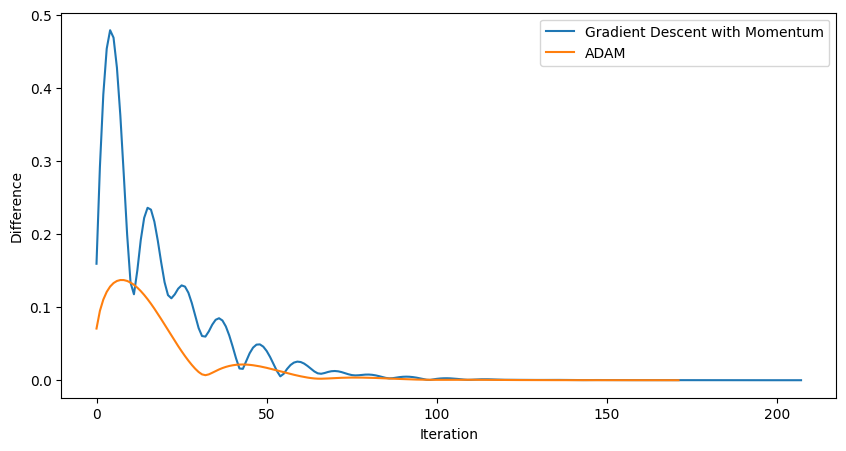

In [7]:
# Calculate difference between successive approximations of the solution 

difference_gd = [np.sqrt((sequence_gd[i+1][0]-sequence_gd[i][0])**2 + (sequence_gd[i+1][1]-sequence_gd[i][1])**2)\
                for i in range(len(sequence_gd)-1)]

difference_adam = [np.sqrt((sequence_adam[i+1][0]-sequence_adam[i][0])**2 + (sequence_adam[i+1][1]-sequence_adam[i][1])**2)\
                  for i in range(len(sequence_adam)-1)]

plt.figure(figsize=(10,5))
plt.plot(difference_gd, label="Gradient Descent with Momentum")
plt.plot(difference_adam, label="ADAM")
plt.xlabel("Iteration")
plt.ylabel("Difference")
plt.legend()
plt.show()

In [8]:
# Visualization of the path
def planegraph(f, x_range, y_range, x_seq, y_seq, Algorithm):
    X, Y = np.meshgrid(x_range, y_range)
    Z = f(X, Y)
    fig = go.Figure(data=go.Contour(z=Z, x=x_range, y=y_range))
    fig.add_trace(go.Scatter(x=x_seq, 
                             y=y_seq, 
                             mode='lines+markers', 
                             line=dict(color="white")))
    fig.update_layout(title_text = Algorithm, 
                      xaxis_title='x', 
                      yaxis_title='y', 
                      width=800, 
                      height=500)
    png_bytes = pio.to_image(fig, format="png")
    display(Image(png_bytes))

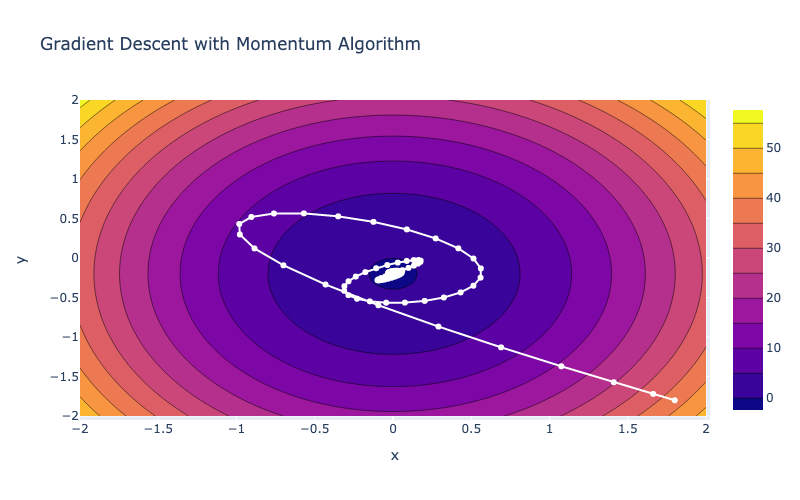

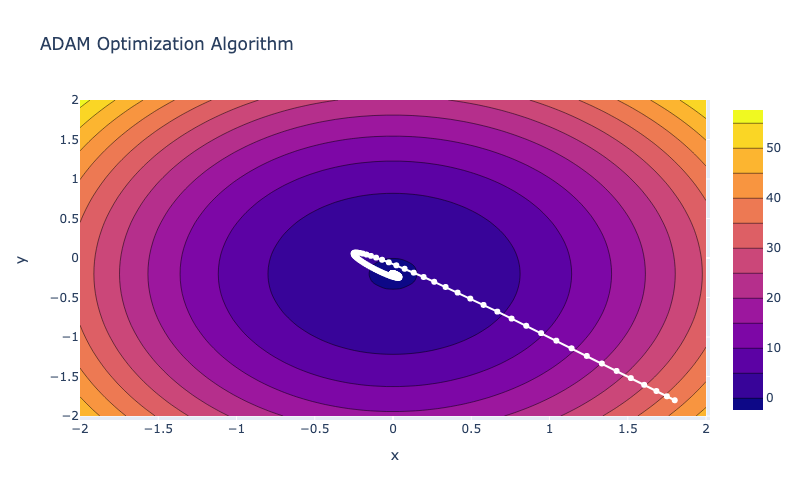

In [9]:
# Choose the dots for visualization
x1 = [item[0] for item in sequence_gd]
y1 = [item[1] for item in sequence_gd]
x2 = [item[0] for item in sequence_adam]
y2 = [item[1] for item in sequence_adam]
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)

planegraph(func, x, y, x1, y1, "Gradient Descent with Momentum Algorithm")
planegraph(func, x, y, x2, y2, "ADAM Optimization Algorithm")

# 4. Conclusion

In the laboratory work I developed implementations of Gradient Descent with momentum algorithm and the ADAM algorithm of optimization. The algorithms were tested on the function f(x,y) =8x^2 + 5y^2 + sin(x) - x + 2y with the same hyperparameters and the initial point at [1.8, -1.8].

According to the results, both of the implementations work correctly and return almost the same pairs of coordinates, reaching global minima. The ADAM algorythm needed less iterations to reach the result. 
The results of visualization show that GD with momentum made larger steps compared with ADAM and it was increasing the size of the step several times, while ADAM reached point gradually decreasing the step size. Also the path of the ADAM algorythm was smoother as it uses exponential decay, while GD with momentum was circling around the goal.

To sum up, both algorythms were effective in reaching the minima of the function. However the ADAM algorythm converges faster, it needs more parameters to be adjusted.